In [1]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df=pd.read_csv(r"C:\Users\User\OneDrive\Documents\emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.shape

(5172, 3002)

In [4]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df['Email No.'],
                                                 df['Prediction'],
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=df['Prediction'])

In [9]:
df.shape

(5172, 3002)

In [10]:
x_train.shape

(4137,)

In [11]:
y_test.value_counts()

Prediction
0    735
1    300
Name: count, dtype: int64

In [12]:
y_train.value_counts()

Prediction
0    2937
1    1200
Name: count, dtype: int64

# Bow / count vector

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
bow = CountVectorizer(min_df=10,ngram_range=(1,2),stop_words = 'english')
x_train_bow = bow.fit_transform(x_train)


In [15]:
x_train_bow.todense()
bow.get_feature_names_out()

array(['email'], dtype=object)

In [16]:
x_test_bow =  bow.transform(x_test)

In [17]:
x_train_bow.todense()

matrix([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int64)

In [18]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor = regressor.fit(x_train_bow,y_train)

In [19]:
larg_coef = regressor.coef_.argmax()

In [20]:
larg_coef 

0

In [21]:
sorted_ind = regressor.coef_.argsort()
sorted_ind

array([[0]], dtype=int64)

In [22]:
# maximum value
regressor.coef_.max()

1.0051905114455894e-05

In [23]:
regressor.predict_proba(x_test_bow)

array([[0.70993492, 0.29006508],
       [0.70993492, 0.29006508],
       [0.70993492, 0.29006508],
       ...,
       [0.70993492, 0.29006508],
       [0.70993492, 0.29006508],
       [0.70993492, 0.29006508]])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [25]:
y_pred = regressor.predict(x_test_bow)

In [26]:
score = accuracy_score(y_pred,y_test)
print("Accuracy of the model=",score)

Accuracy of the model= 0.7101449275362319


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
confusion_matrix(y_test,y_pred)

array([[735,   0],
       [300,   0]], dtype=int64)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       735
           1       0.00      0.00      0.00       300

    accuracy                           0.71      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.50      0.71      0.59      1035



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TFIDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf = TfidfVectorizer(min_df = 5,ngram_range=(1,5),stop_words = 'english')
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

In [33]:
tfidf.get_feature_names_out()

array(['email'], dtype=object)

In [34]:
regressor = LogisticRegression()
regressor = regressor.fit(x_train_tf,y_train)

In [35]:
len(regressor.coef_[0])
larg_coef=regressor.coef_.argmax()
tfidf.get_feature_names_out()[larg_coef]

'email'

In [36]:
y_pred_tf = regressor.predict(x_test_tf)

In [37]:
score = accuracy_score(y_pred_tf,y_test)
print("Accuracy of the model=",score)

Accuracy of the model= 0.7101449275362319


In [38]:
confusion_matrix(y_test,y_pred_tf)

array([[735,   0],
       [300,   0]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred_tf))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       735
           1       0.00      0.00      0.00       300

    accuracy                           0.71      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.50      0.71      0.59      1035



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Document clustering

In [40]:
# Storing labels to use later 
labels=df['Email No.'].unique()

In [41]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
x_train_tf = tf_idf_vect.fit_transform(x_train)
x_train_cv = count_vect.fit_transform(x_train)

# Check Shape of Count Vector
print(x_train_tf.shape)
print(x_train_cv.shape)

(4137, 8275)
(4137, 8275)


In [42]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
x_train_pca = pca.fit_transform(x_train_cv.todense())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [43]:
sum(np.cumsum(pca.explained_variance_ratio_)<0.9)

3722

In [44]:
pca = PCA(n_components=445)
x_train_pca = pca.fit_transform(x_train_tf.todense())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [45]:
x_train_pca.shape

(4137, 445)

In [46]:
x = x_train_pca

In [47]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(x)
    pred_labels = kmeans.labels_
    Sum_of_squared_distances.append(kmeans.inertia_)
    from sklearn import metrics
    ss = metrics.silhouette_score(x, pred_labels , metric='euclidean')
    silhouette_scores.append(ss)

2
3
4
5
6
7
8
9
10
11
12
13
14


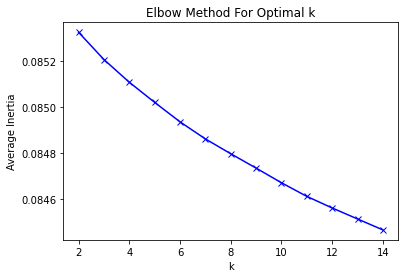

In [48]:
avg_inertia = [i/df.shape[0] for i in Sum_of_squared_distances]

import matplotlib.pyplot as plt

plt.plot(K, avg_inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

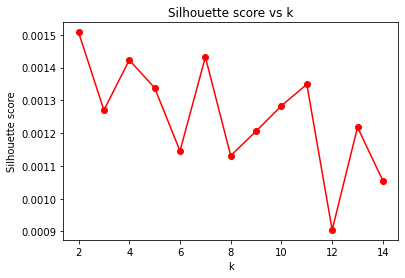

In [49]:
plt.plot(K,silhouette_scores,'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs k')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=10,init='k-means++').fit(x)
pred_labels = kmeans.labels_

In [51]:
from sklearn import metrics
ss = metrics.silhouette_score(x, pred_labels , metric='euclidean')
print("Silhoutte Score: ", ss)

Silhoutte Score:  0.0012825869076564956


# Latent Semantic Analysis (LSA)

In [52]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')+['said','u','v','s','t']

In [53]:
 #TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

count_vect = CountVectorizer(lowercase=True,
                        stop_words=stop,
                        ngram_range = (1,2),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
x_train_tf = tf_idf_vect.fit_transform(x_train)
x_train_cv = count_vect.fit_transform(x_train)

# Check Shape of Count Vector
x_train_tf.shape
x_train_cv.shape

(4137, 8275)

In [54]:
from sklearn.decomposition import TruncatedSVD
number_of_topics = 5
svd_model = TruncatedSVD(n_components=number_of_topics, n_iter=100, random_state=23)
svd_model.fit(x_train_tf)

TruncatedSVD(n_components=5, n_iter=100, random_state=23)

In [55]:
x_transformed = svd_model.transform(x_train_tf)
U = x_transformed / svd_model.singular_values_
Sigma_matrix = np.diag(svd_model.singular_values_)
VT = svd_model.components_

In [56]:
terms = tf_idf_vect.get_feature_names()
# terms = count_vect.get_feature_names()

for i, comp in enumerate(VT):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("\nTopic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])


Topic 0: 
email
3347
757
email 3347
email 757
4649
4941
email 4649
email 4941
2351

Topic 1: 
3155
email 3155
2550
email 2550
1647
email 1647
1175
email 1175
3122
email 3122

Topic 2: 
3749
email 3749
471
email 471
3611
email 3611
3074
email 3074
70
email 70

Topic 3: 
1840
email 1840
646
email 646
5008
email 5008
4883
email 4883
3003
email 3003

Topic 4: 
774
email 774
4662
email 4662
5120
email 5120
2069
email 2069
2945
email 2945


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
VT[0]

array([0.00205059, 0.00205059, 0.00205059, ..., 0.00205059, 0.00205059,
       0.00205059])

In [58]:
tf_idf_vect.get_feature_names()

['1',
 '10',
 '1000',
 '1001',
 '1002',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '101',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '102',
 '1021',
 '1022',
 '1023',
 '1024',
 '1026',
 '1027',
 '1028',
 '1029',
 '103',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1036',
 '1037',
 '1038',
 '1039',
 '104',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1048',
 '1049',
 '105',
 '1050',
 '1052',
 '1053',
 '1054',
 '1056',
 '1058',
 '1059',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '1066',
 '1068',
 '1069',
 '107',
 '1071',
 '1072',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1080',
 '1082',
 '1083',
 '1084',
 '1086',
 '1088',
 '1089',
 '109',
 '1090',
 '1091',
 '1092',
 '1093',
 '1095',
 '1097',
 '1098',
 '1099',
 '11',
 '110',
 '1100',
 '1101',
 '1102',
 '1103',
 '1104',
 '1106',
 '1107',
 '1108',
 '1109',
 '111',
 '1111',
 '1114',
 '1115',
 '1116',
 '1117',
 '1118',
 '1119',
 '112',
 '1120',


In [59]:
sorted(list(zip(tf_idf_vect.get_feature_names()[:10],VT[0][0:10])),key= lambda x:x[1], reverse=True)

[('1008', 0.0020505878813769575),
 ('1001', 0.002050587881376952),
 ('1006', 0.0020505878813769467),
 ('1007', 0.002050587881376938),
 ('1004', 0.0020505878813769363),
 ('1000', 0.002050587881376936),
 ('1005', 0.002050587881376933),
 ('10', 0.002050587881376928),
 ('1002', 0.0020505878813769254),
 ('1', 0.002050587881376762)]

In [60]:
Sigma_matrix

array([[5.34333653, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99666377, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99666377, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.99666377, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.99666377]])

In [61]:
svd_model.singular_values_

array([5.34333653, 0.99666377, 0.99666377, 0.99666377, 0.99666377])

In [62]:
U.shape

(4137, 5)

In [63]:
VT.shape

(5, 8275)

In [64]:
pip install threadpoolct1==3.1.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement threadpoolct1==3.1.0 (from versions: none)
ERROR: No matching distribution found for threadpoolct1==3.1.0


# Latent Dirichlet Allocation (LDA)

In [65]:
import gensim
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import string 
from gensim.models.coherencemodel import CoherenceModel

In [66]:
corpus = df.text

In [67]:
stop = set(stopwords.words('english'))
stop.update(set(['s','said','will','year','new','u','v']))

In [68]:
punc = set(string.punctuation)

In [69]:
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    normalized = [lemmatizer.lemmatize(df) for df in df]
    return normalized

In [70]:
cleaned_corpus = [preprocess(text) for text in corpus]

In [71]:
corpus[0]

0

In [72]:
cleaned_corpus[0]

['Email No.',
 'the',
 'to',
 'ect',
 'and',
 'for',
 'of',
 'a',
 'you',
 'hou',
 'in',
 'on',
 'is',
 'this',
 'enron',
 'i',
 'be',
 'that',
 'will',
 'have',
 'with',
 'your',
 'at',
 'we',
 's',
 'are',
 'it',
 'by',
 'com',
 'a',
 'from',
 'gas',
 'or',
 'not',
 'me',
 'deal',
 'if',
 'meter',
 'hpl',
 'please',
 're',
 'e',
 'any',
 'our',
 'corp',
 'can',
 'd',
 'all',
 'ha',
 'wa',
 'know',
 'need',
 'an',
 'forwarded',
 'new',
 't',
 'may',
 'up',
 'j',
 'mmbtu',
 'should',
 'do',
 'am',
 'get',
 'out',
 'see',
 'no',
 'there',
 'price',
 'daren',
 'but',
 'been',
 'company',
 'l',
 'these',
 'let',
 'so',
 'would',
 'm',
 'into',
 'xl',
 'farmer',
 'attached',
 'u',
 'information',
 'they',
 'message',
 'day',
 'time',
 'my',
 'one',
 'what',
 'only',
 'http',
 'th',
 'volume',
 'mail',
 'contract',
 'which',
 'month',
 'more',
 'robert',
 'sitara',
 'about',
 'texas',
 'nom',
 'energy',
 'pec',
 'question',
 'www',
 'deal',
 'volume',
 'pm',
 'ena',
 'now',
 'their',
 'file

In [73]:
from gensim import corpora
d = corpora.Dictionary(cleaned_corpus)
d.token2id

{'Email No.': 0,
 'Prediction': 1,
 'a': 2,
 'abdv': 3,
 'ability': 4,
 'able': 5,
 'about': 6,
 'above': 7,
 'ac': 8,
 'accept': 9,
 'acceptance': 10,
 'accepted': 11,
 'access': 12,
 'according': 13,
 'account': 14,
 'accountant': 15,
 'accounting': 16,
 'accuracy': 17,
 'accurate': 18,
 'achieve': 19,
 'acquire': 20,
 'acquisition': 21,
 'across': 22,
 'act': 23,
 'action': 24,
 'active': 25,
 'activity': 26,
 'acton': 27,
 'actual': 28,
 'actually': 29,
 'actuals': 30,
 'ad': 31,
 'add': 32,
 'added': 33,
 'adding': 34,
 'addition': 35,
 'additional': 36,
 'additionally': 37,
 'address': 38,
 'addressed': 39,
 'adjust': 40,
 'adjusted': 41,
 'adjustment': 42,
 'administration': 43,
 'adobe': 44,
 'adonis': 45,
 'adult': 46,
 'advance': 47,
 'advanced': 48,
 'advantage': 49,
 'advertisement': 50,
 'advice': 51,
 'advise': 52,
 'advised': 53,
 'advises': 54,
 'advisor': 55,
 'aeor': 56,
 'aep': 57,
 'aepin': 58,
 'affect': 59,
 'affected': 60,
 'affiliate': 61,
 'affordable': 62,
 'a

In [74]:
d.doc2bow(['ability','ability'])

[(4, 2)]

In [75]:
print(d)

Dictionary(2729 unique tokens: ['Email No.', 'Prediction', 'a', 'abdv', 'ability']...)


In [76]:
doc_term_matrix = [d.doc2bow(i) for i in cleaned_corpus]

In [77]:
Lda = gensim.models.ldamodel.LdaModel

In [78]:
lda_model = Lda(doc_term_matrix,num_topics=2,id2word=d,passes=2,random_state=0)

# Higher the coherence score better the topic model


In [79]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_corpus, dictionary=d, coherence='c_v')

In [80]:
coherence_lda = coherence_model_lda.get_coherence()

In [81]:
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5993474623957178


In [82]:
lda_model.print_topics()

[(0,
  '0.001*"hour" + 0.001*"entry" + 0.001*"payment" + 0.001*"tax" + 0.001*"m" + 0.001*"provider" + 0.001*"stock" + 0.001*"term" + 0.001*"mail" + 0.001*"head"'),
 (1,
  '0.001*"process" + 0.001*"give" + 0.001*"lot" + 0.001*"place" + 0.001*"investor" + 0.001*"cd" + 0.001*"well" + 0.001*"activity" + 0.001*"ce" + 0.001*"way"')]

In [83]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, d)

In [85]:
p

PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
1      0.00319  0.0       1        1  50.028039
0     -0.00319  0.0       2        1  49.971961, topic_info=         Term          Freq         Total Category  logprob  loglift
1160     hour  10336.000000  10336.000000  Default  30.0000  30.0000
2047  remains   5177.000000   5177.000000  Default  29.0000  29.0000
810     entry  10336.000000  10336.000000  Default  28.0000  28.0000
1800  payment  10337.000000  10337.000000  Default  27.0000  27.0000
2391      tax  10337.000000  10337.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1523     mean   5905.357162  10340.706317   Topic2  -7.1807   0.1335
2527        u   5885.109562  10340.850209   Topic2  -7.1842   0.1300
1371     last   5881.543098  10340.875914   Topic2  -7.1848   0.1294
1530   medium   5841.364035  10341.075631   Topic2  -7.1916   0.1225
1532  meeting   5838.815528  10341.105167   Topic2  -7.1921   0.1221

[146 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
14        1  0.425894     account
14        2  0.574145     account
26        1  0.594597    activity
26        2  0.405416    activity
42        1  0.573501  adjustment
...     ...       ...         ...
2642      2  0.403479        well
2692      1  0.627387       world
2692      2  0.372529       world
2697      1  0.638555       write
2697      2  0.361494       write

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])